In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm


file = pd.read_excel ('./Data/Data_Collection.xlsx')

In [11]:
x = pd.DataFrame(file, columns=['Births_Deaths', 'Migration']).iloc[1:71]
y = pd.DataFrame(file, columns=['Population_growth']).iloc[1:71]
#x = pd.DataFrame(file, columns=['Births_Deaths', 'Migration']).iloc[1:218]
#y = pd.DataFrame(file, columns=['Population_growth']).iloc[1:218]
x.shape

(70, 2)

In [12]:
year = pd.DataFrame(file, columns=['year']).iloc[1]
#year

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [14]:
scaler = preprocessing.StandardScaler()

sx_train = scaler.fit_transform(x_train)
sx_test = scaler.fit_transform(x_test)

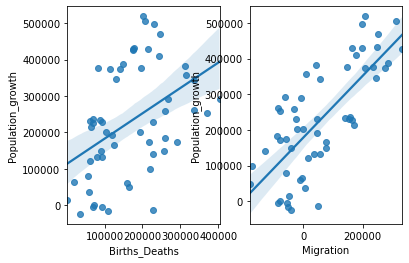

In [15]:
#plt.scatter(x_train[:,1], y_train)
#sns.regplot(x_train[:,1], y_train)

fig, axes = plt.subplots(ncols=2)
plt.subplot(1,2,1)
sns.regplot(x_train.iloc[:,0], y_train)
#sns.regplot(sx_train[:,0], y_train)
plt.subplot(1,2,2)
sns.regplot(x_train.iloc[:,1], y_train)
#sns.regplot(sx_train[:,1], y_train)

In [16]:
lr = LinearRegression()
lr.fit(sx_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
lr.intercept_

array([229549.03005074])

In [11]:
lr.coef_

array([[ 81557.77795666, 123307.8878331 ]])

In [17]:
y_pred = lr.predict(sx_test)


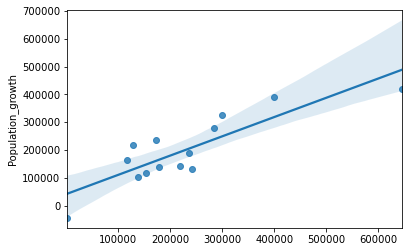

In [13]:

sns.regplot(y_pred, y_test)

In [18]:
#mean square error
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2:", lr.score(sx_test, y_test))

RMSE: 80814.24388881968
R2: 0.5370773731097298


In [31]:
#compare predicted numbers with actual numbes 
check = np.column_stack((y_test, y_pred))

In [32]:
pd.DataFrame(check, columns=['actual', 'predicted'])

,actual,predicted
0,283801.693827,265586.790153
1,198.000000,4910.052970
2,279657.000000,261339.976179
3,279425.855545,260547.785043
4,278601.000000,260077.480258
5,278601.000000,260106.754572
6,278601.000000,260995.153915
7,279657.000000,261936.212683
8,519011.000000,378773.985053
9,279657.000000,261872.606280
